# A Chaos Game with Triangles

John D. Cook [proposed](https://www.johndcook.com/blog/2017/07/08/the-chaos-game-and-the-sierpinski-triangle/) an interesting "game" from the book *[Chaos and Fractals](https://smile.amazon.com/Chaos-Fractals-New-Frontiers-Science/dp/0387202293)*: start at a vertex of an equilateral triangle. Then move to a new point halfway between the current point and one of the three vertexes of the triangle, chosen at random. Repeat to create *N* points, and plot them. What do you get? 

I'll refactor Cook's code a bit and then we'll see:

In [1]:
import matplotlib.pyplot as plt
import random

def random_walk(vertexes, N):
    "Walk halfway from current point towards a random vertex; repeat for N points."
    points = [random.choice(vertexes)]
    for _ in range(N-1):
        points.append(midpoint(points[-1], random.choice(vertexes)))
    return points

def show_walk(vertexes, N=5000):
    "Walk halfway towards a random vertex for N points; show reults."
    Xs, Ys = transpose(random_walk(vertexes, N))
    Xv, Yv = transpose(vertexes)
    plt.plot(Xs, Ys, 'r.')
    plt.plot(Xv, Yv, 'bs')
    plt.gca().set_aspect('equal')
    plt.gcf().set_size_inches(9, 9)
    plt.axis('off')
    plt.show()
    
def midpoint(p, q): return ((p[0] + q[0])/2, (p[1] + q[1])/2)

def transpose(matrix): return zip(*matrix)

triangle = ((0, 0), (0.5, (3**0.5)/2), (1, 0))

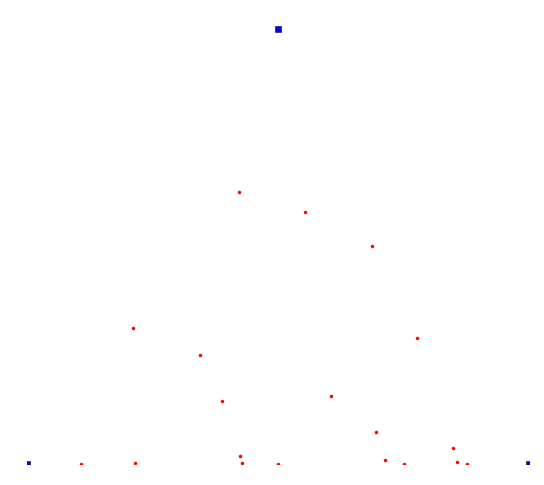

In [2]:
show_walk(triangle, 20)

OK, the first 20 points don't tell me much. What if I try 20,000 points?

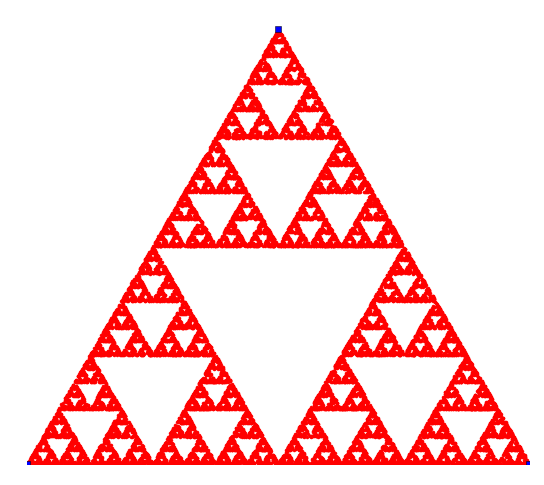

In [3]:
show_walk(triangle, 20000)

Wow! The [Sierpinski Triangle](https://en.wikipedia.org/wiki/Sierpinski_triangle)! 
What happens if we start with a different set of vertexes, like a square?

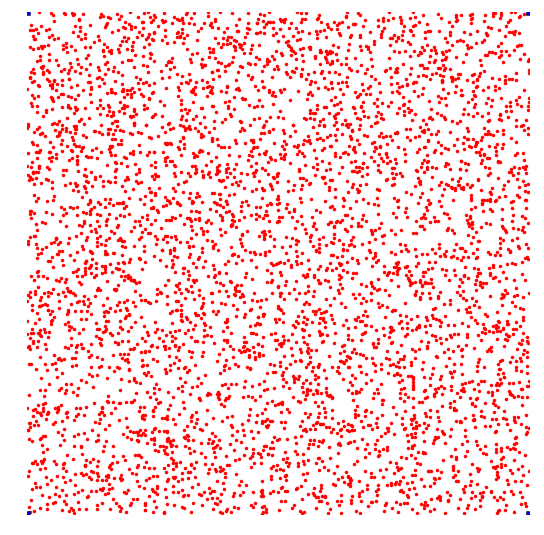

In [4]:
square = ((0, 0), (0, 1), (1, 0), (1, 1))

show_walk(square)

There doesn't seem to be any structure there. Let's try again to make sure:

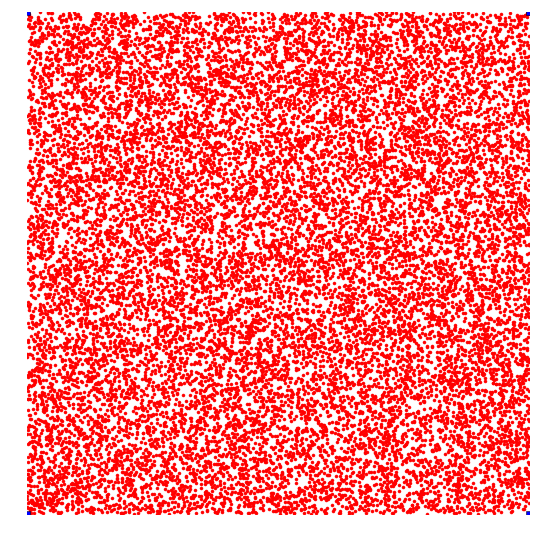

In [5]:
show_walk(square, 20000)

I'm still not seeing anything but random points. How about a right triangle?

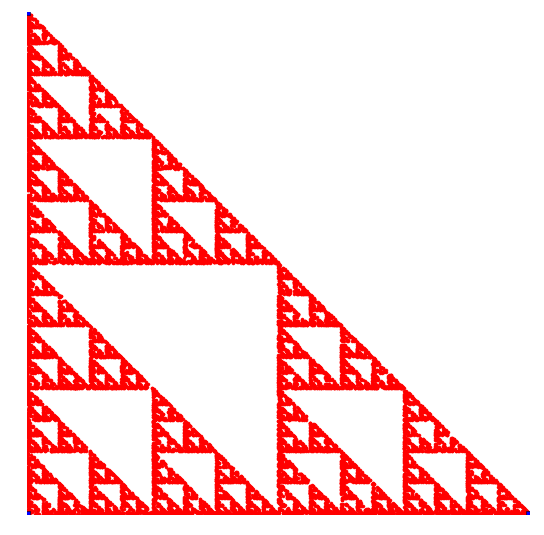

In [6]:
right_triangle = ((0, 0), (0, 1), (1, 0))

show_walk(right_triangle, 20000)

We get a squished Serpinski triangle. How about a pentagon? (I'm lazy so I had Wolfram Alpha [compute the vertexes](https://www.wolframalpha.com/input/?i=vertexes+of+regular+pentagon).)

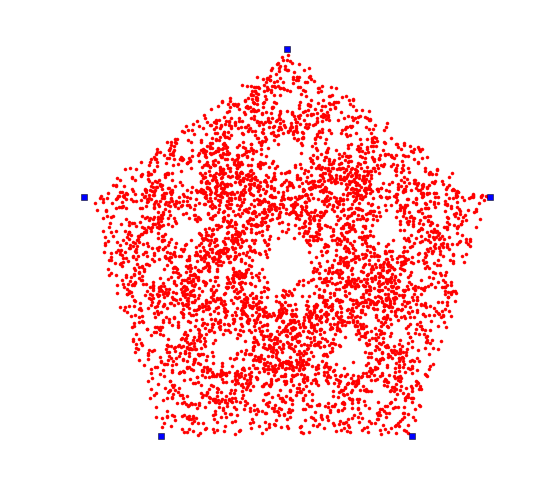

In [7]:
pentagon = ((0.5, -0.688), (0.809, 0.262), (0., 0.850), (-0.809, 0.262), (-0.5, -0.688))

show_walk(pentagon)

To clarify, let's try again with different numbers of points:

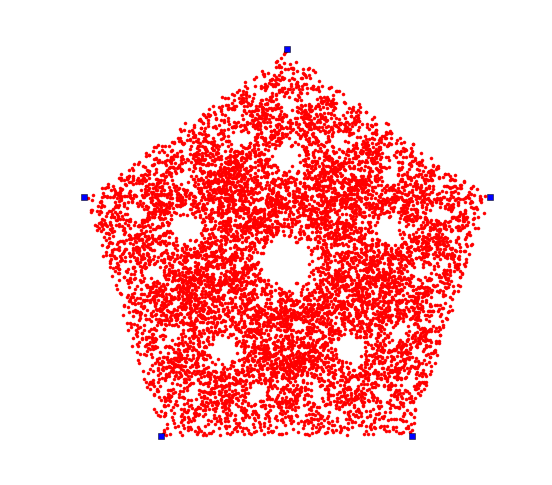

In [8]:
show_walk(pentagon, 10000)

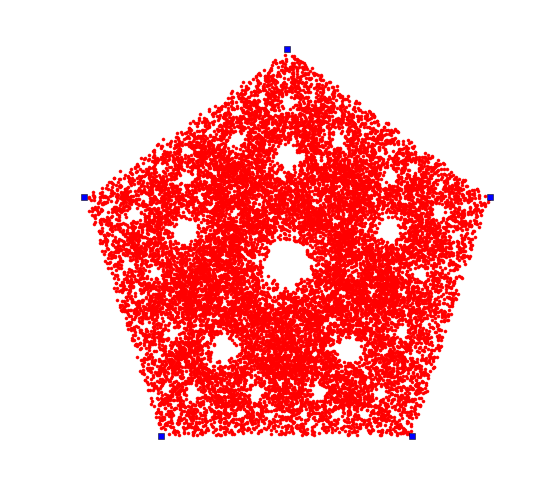

In [9]:
show_walk(pentagon, 20000)

I definitely see a central hole, and five secondary holes surrounding that, and then, maybe 15 holes surrounding those? Or maybe not 15; hard to tell. Is a "Sierpinski Pentagon" a thing? I hadn't heard of it but a [quick search](https://www.google.com/search?q=sierpinski+pentagon) reveals that yes indeed, it is [a thing](http://ecademy.agnesscott.edu/~lriddle/ifs/pentagon/sierngon.htm), and it does have 15 holes surrounding the 5 holes. Let's try the hexagon:

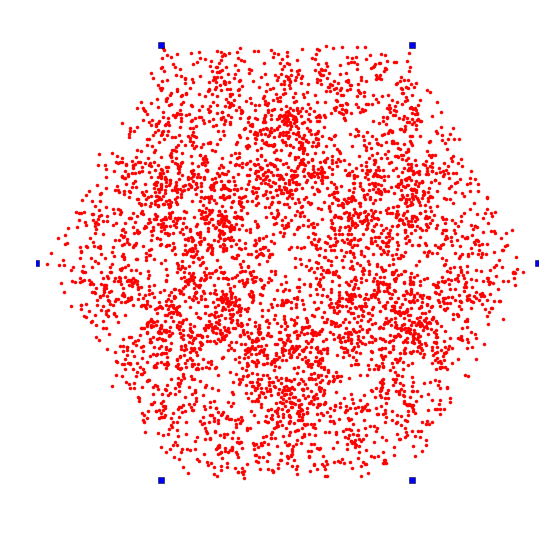

In [10]:
hexagon = ((0.5, -0.866), (1, 0), (0.5, 0.866), (-0.5, 0.866), (-1, 0), (-0.5, -0.866))

show_walk(hexagon)

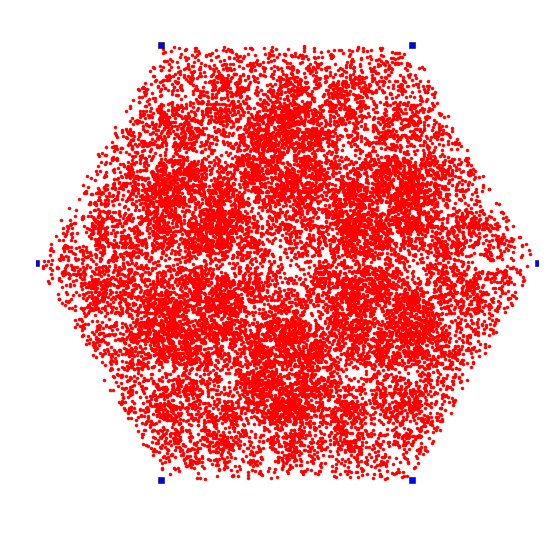

In [11]:
show_walk(hexagon, 20000)

You can see a little of the six-fold symmetry, but it is not as clear as the triangle and pentagon.